<a href="https://colab.research.google.com/github/SimonParadise/MPA-MLF-Buchta-228812/blob/main/05feedforneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=3000, batch_size=1, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


In [ ]:
for id_x, data_sample in enumerate(X):
  data_sample = np.reshape(data_sample, (1, 2))
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Data sample is [[0 0]], prediction from model [[0.00146765]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_12
Received: inputs=('Tensor(shape=(1, 2))',)
  warnings.warn(msg)


Data sample is [[0 1]], prediction from model [[0.9981342]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Data sample is [[1 0]], prediction from model [[0.99813414]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Data sample is [[1 1]], prediction from model [[0.00158293]], ground_truth 0


Text(0, 0.5, 'loss')

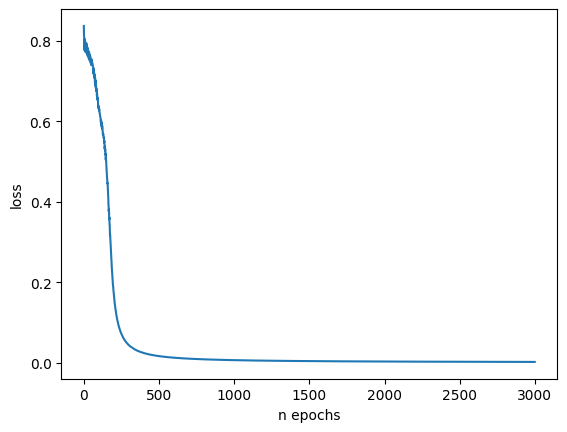

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_to_dataset = 'drive/MyDrive/MyDrive/MPA-MLF/EX-5/voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

pd_dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [ ]:
# define a function for train and test split

def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [ ]:
x_train

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
344,?,?,?,n,n,n,y,y,y,y,n,n,y,n,y,y
345,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
346,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y


In [ ]:
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True)
#x_train

x=pd.get_dummies(x_train)
x

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
59,False,True,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,False,True
37,False,True,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
132,True,False,True,False,False,True,False,True,False,True,...,True,False,False,True,False,True,False,True,False,True
184,False,True,True,False,False,True,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
295,True,False,False,True,False,True,True,False,False,True,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,True,False,True,False,False,True,False,True,False,True,...,True,False,True,False,False,True,True,False,False,True
74,True,False,True,False,False,True,True,False,False,True,...,False,True,False,True,False,True,True,False,False,True
9,True,False,False,True,True,False,False,True,False,True,...,True,False,False,True,False,True,True,False,True,False
38,True,False,True,False,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,True,False


In [ ]:
y = y_train.replace({'republican':1, 'democrat':0})
y

,Class Name
59,0
37,0
132,0
184,0
295,0
...,...
220,1
74,0
9,1
38,1


In [ ]:
model = Sequential()
model.add(Dense(8, input_shape=(x.shape[1],),activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

history = model.fit(x_train, y_train, epochs=40, batch_size=4, verbose=1, validation_data=(x_val,y_val))

Epoch 1/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9848 - loss: 0.0503 - val_accuracy: 1.0000 - val_loss: 4.9413e-04
Epoch 2/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0375 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9917 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 5/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 6/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 7/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0207 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 8/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0165 - val_accuracy: 1.0000 - val_l

In [ ]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_train.mode().iloc[0], inplace=True)

x_te=pd.get_dummies(x_test)
x_te

y_te = y_test.replace({'republican':1, 'democrat':0})
y_te

<ipython-input-94-25888e0aafc3>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_te = y_test.replace({'republican':1, 'democrat':0})


,Class Name
0,0
1,1
2,1
3,0
4,1
...,...
82,0
83,0
84,0
85,1


In [ ]:
loss, accuracy = model.evaluate(x_te, y_te, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))
print('Loss: {:.2f}'.format(loss*100))

Accuracy: 91.95
Loss: 60.51


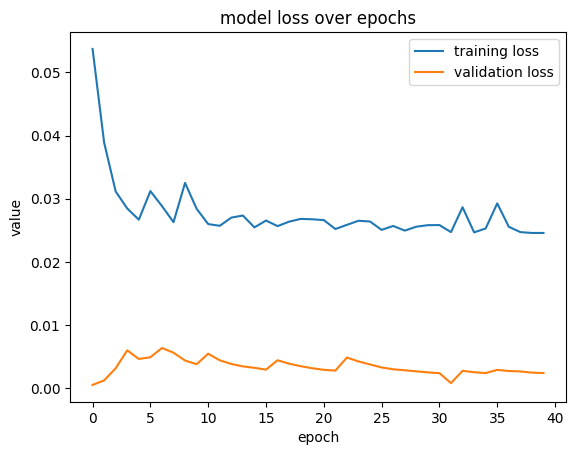

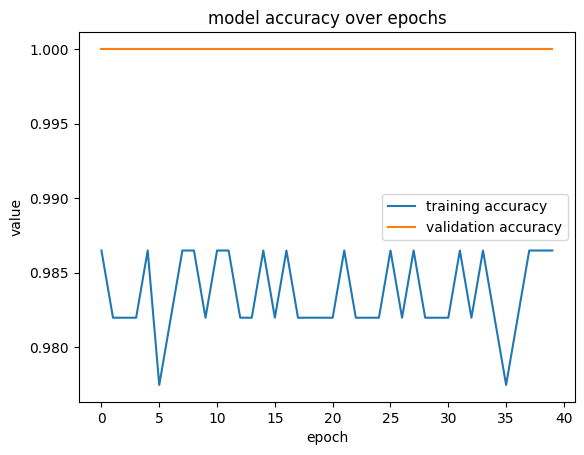

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='training loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.set_ylabel('value')
ax.set_xlabel('epoch')
ax.set_title('model loss over epochs')
ax.legend()
plt.show()

fig, ay = plt.subplots()
ay.plot(history.history['accuracy'], label='training accuracy')
ay.plot(history.history['val_accuracy'], label='validation accuracy')
ay.set_ylabel('value')
ay.set_xlabel('epoch')
ay.set_title('model accuracy over epochs')
ay.legend()
plt.show()